# Principal Component Analysis

This notebook is part of the lecture "Image processing and computer vision" of the [First Nepal Winter School on AI](https://nepalschool.naamii.com.np/)  which is adapted from the material prepared by Bishesh Khanal for "Mathematics in Computer Vision and Machine Learning" of the [NPCVML](https://npcvml.org) Winter School 2016.
We explore PCA which is one of the very basic and important techniques to understand dimensionality reduction and latent representation.
It also lets us one way to look at eigenvectors and eigenvalues.

## Import necessary libraries

In [5]:
import numpy as np
from scipy import misc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', palette='Set2', font_scale=1.5)

## Load data 

There is a synthetic data of height, weight and sex created for tomorrow's machine learning lecture. We will load that data here and explore it.

In [2]:
wt_ht = pd.read_csv('weight_height_data.csv')
wt_ht.head()

,weight,height,gender
0,64.31,156.69,male
1,47.18,158.88,male
2,47.21,162.66,male
3,59.14,158.42,male
4,65.14,161.60,male


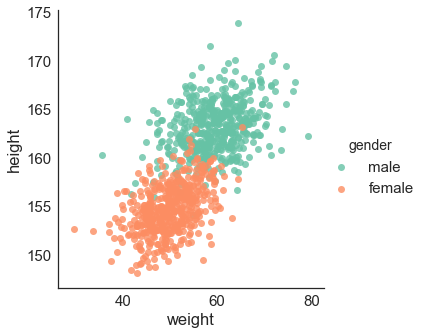

In [21]:
ax = sns.lmplot('weight', 'height', data=wt_ht, hue='gender', fit_reg=False, )

## Let us forget that there are two groups
 
Let us forget for a while that the data was originally coming from two different groups with different mean height and weight. So we will see only two features weight and height as follows:

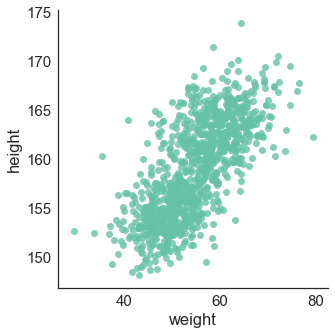

In [22]:
ax = sns.lmplot('weight', 'height', data=wt_ht, hue=None, fit_reg=False)

In [8]:
# Convert weight and height into numpy array
A = wt_ht[['weight', 'height']].values
print( A.shape)
print(A[0:5,:])

(1000, 2)
[[ 64.31 156.69]
 [ 47.18 158.88]
 [ 47.21 162.66]
 [ 59.14 158.42]
 [ 65.14 161.6 ]]


Now, we have a matrix of size 1000 X 2. Each column is one feature. In this case we have two features: weight and height. Number of rows is equal to the number of data points. We will now see how the eigenvectors and eigenvalues of its covariance matrix tells us more about the data. What we will be doing now is called principal component analysis (PCA). 

## Step 1: Computing a covariance matrix $C$

### Statistics preliminaries

Mean: $\bar x = \frac{\sum_{i=1}^{n}{X_i}}{n}$

Variance: $\mathrm{Var}(x) = \frac{\sum_{i=1}^{n}(x_i - \bar x)^2}{n-1}$

Variance provides a measure for how much the data vary over its mean.

Covariance of two variables:  $\mathrm{cov}(x, y) = \frac{\sum_{i=1}^{n}(x_i - \bar x)(y_i - \bar y)}{n-1}$

Covariance provides a measure for how much the two variables vary from mean with respect to each other.

### Our weight and height data

We have the two variables weight and height as:

$A = $ $
\begin{bmatrix}
\text{Weight}(x) & \text{Height} (y)\\
\hline
64.31  & 156.69 \\
47.18  & 158.88 \\
47.21  & 162.66 \\
... & ...
\end{bmatrix}
$  A matrix of size 1000 X 2

Subtract mean from each column to get $D$. Also known as *centering the data*.

$D = \begin{bmatrix}
64.31 - \bar x  & 156.69 - \bar y\\
47.18 - \bar x & 158.88 - \bar y\\
47.21 - \bar x  & 162.66 - \bar y\\
... & ...
\end{bmatrix}
$

Covariance matrix: 

$C = \frac{D^T D}{n-1} = 
\begin{bmatrix} 
\mathrm{Var}(x) & \mathrm{Covar}(x,y)\\
\mathrm{Covar}(x,y) & \mathrm{Var}(y)
\end{bmatrix}$ A symmetric matrix of size 2X2

In [9]:
# Compute mean of each column
mu = np.mean(A, axis=0)
# Center the data
D = A - mu
# Compute covariance
C = (D.T).dot(D) / (A.shape[0]-1)
print('Covariance matrix \n%s' %C)

Covariance matrix 
[[54.54273984 26.09703976]
 [26.09703976 24.65939673]]


In [24]:
print(D)

[[  9.60138  -2.26784]
 [ -7.52862  -0.07784]
 [ -7.49862   3.70216]
 ...
 [  0.28138  -4.85784]
 [-11.08862  -8.42784]
 [  2.50138  -2.79784]]


## Step 2: Compute Eigenvalues and Eigenvectors of $C$

The eigenvectors of the covariance matrix are know as principal components or directions and the eignevalues are the principal values. Eigenvectors corresponding to the higher values of eigenvalues describe the most part of the data. 

The biggest principal component describes the largest variance in the data.

The eigenvector with lowest eigenvalue describes the least variance in data.

In [23]:
np.linalg.eig(C)

(array([69.67279974,  9.52933682]), array([[ 0.86512071, -0.50156371],
        [ 0.50156371,  0.86512071]]))

In [12]:
eig_vals, eig_vecs = np.linalg.eig(C)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.86512071 -0.50156371]
 [ 0.50156371  0.86512071]]

Eigenvalues 
[69.67279974  9.52933682]


### Step 3: Projecting the data into a feature subspace

Here we select a certain number of principal components over which to project our data. In our case, we are working with 2D, so let us just project into a line in the direction of eigenvector with the highest eigenvalue.
The projection  matrix is created by accumulating each of the selected eigenvectors as a column.

In [13]:
# Eigenvecs are kept row wise, convert it to a projection matrix by taking its transpose
eig_vecs = eig_vecs.T

[[  9.44381893   2.85374845]
 [ -6.47412336  -3.8434236 ]
 [ -8.34408057  -0.5582204 ]
 ...
 [  2.67994393  -4.06148799]
 [ -5.36589608 -12.85274834]
 [  3.56729066  -1.16586789]]


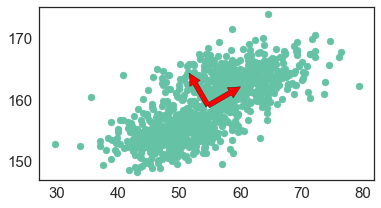

In [25]:
# Project the data into all the feature space.
projected_data = np.dot(D, eig_vecs)
print(projected_data)
# Mean of the standard deviations in each principal directions
sigma = projected_data.std(axis=0).mean()
fig, ax = plt.subplots()
ax.scatter(wt_ht['weight'], wt_ht['height'])
#ax = sns.lmplot('weight', 'height', data=wt_ht, hue=None, fit_reg=False, size = 7)
for axis in eig_vecs:
    start, end = mu, mu + sigma * axis 
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=5.0))
ax.set_aspect('equal')
#plt.show()

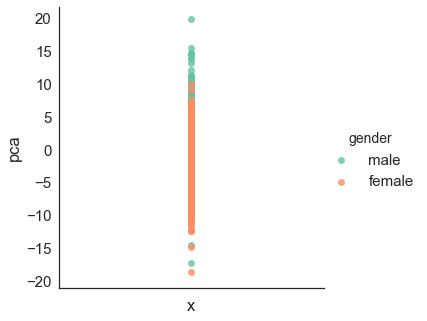

In [20]:
# Projecting into a subspace, in our case a line.
project_line = np.dot(D, eig_vecs.T[0])
wt_ht['pca'] = project_line
#wt_ht['id'] = wt_ht.index.values
wt_ht['x'] = len(wt_ht['pca1'])*[0,]
#ax = sns.lmplot('weight', 'height', data=wt_ht, hue='gender', fit_reg=False, size = 7)
#ax = sns.lmplot('id', 'pca1', data=wt_ht, hue='gender', fit_reg=False, height = 7)
ax = sns.lmplot('x', 'pca', data=wt_ht, hue='gender', fit_reg=False,)
ax.set_xticklabels('0')

# Some notes and resources

## Data centering

We computed covariance matrix of the data which includes the centering of the data. In other methods, if the data is not centered you need to first do that. These following links are of very good discussion about this:

1. http://stats.stackexchange.com/questions/189822/how-does-centering-make-a-difference-in-pca-for-svd-and-eigen-decomposition

2. http://stats.stackexchange.com/questions/22329/how-does-centering-the-data-get-rid-of-the-intercept-in-regression-and-pca

## Understanding PCA

The following link has an answer to a PCA question which explains in a very good way its meaning.

http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues